In [21]:
# Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')
##D-TALE
import plotly.express as px
import dtale
##Plots
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
##ProfileReport
from ydata_profiling import ProfileReport as pp
from pandas_profiling import ProfileReport 


import sweetviz 

##Autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()




In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv')

# Generate a profiling report
profile = ProfileReport(df, title="Data Profiling Report")
profile.to_file("data_profiling_report.html")

profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df.head(10)
df.shape

(344, 7)

In [4]:
df.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
#dropping some values
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [7]:
df.shape

(333, 7)

In [8]:
#chechiking the values of sex to binary o or 1 
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [9]:
label_encoder = LabelEncoder()
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])

In [10]:

df['sex'].value_counts()

sex
1    168
0    165
Name: count, dtype: int64

In [11]:
df['island'].value_counts()

island
0    163
1    123
2     47
Name: count, dtype: int64

In [12]:
x_features = df.drop('species', axis=1)
y_target = df['species']

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [13]:
#KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)
knn_predictions = knn_model.predict(x_test_scaled)
print("KNN classification report")
print(classification_report(y_test, knn_predictions))


#logistic regression
log_reg_model = LogisticRegression(solver='liblinear')
log_reg_model.fit(x_train_scaled, y_train)
log_reg_predictions = log_reg_model.predict(x_test_scaled)
print("Logistic regression classification report")
print(classification_report(y_test, log_reg_predictions))

#linear discriminant analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train_scaled, y_train)
lda_predictions = lda_model.predict(x_test_scaled)
print("LDA classification report")
print(classification_report(y_test, lda_predictions))




KNN classification report
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

Logistic regression classification report
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

LDA classification report
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94  

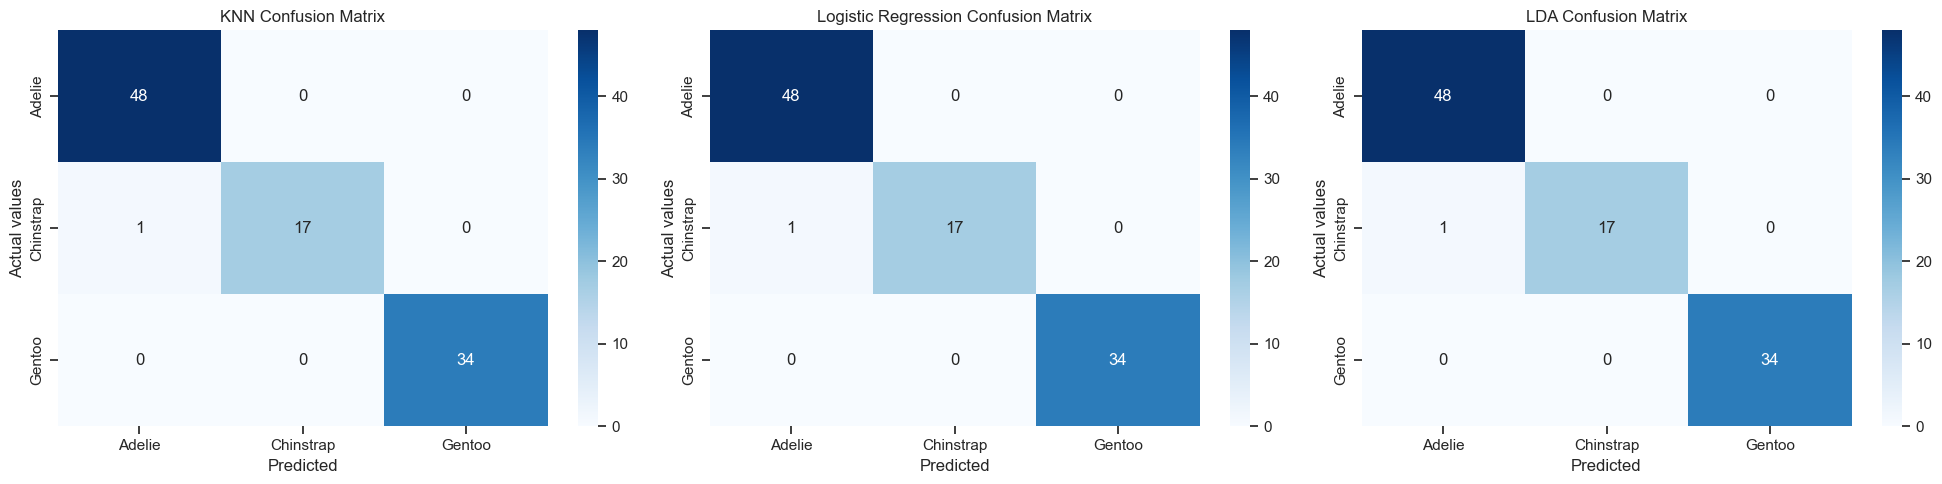

In [17]:
#plotting the confusion matrix before we optimize the model

# here we will crete a confusion matrix for each model
cm_knn = confusion_matrix(y_test, knn_predictions)
cm_log_reg = confusion_matrix(y_test, log_reg_predictions)
cm_lda = confusion_matrix(y_test, lda_predictions)

#plotting the confusion matrix with different colors 
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(pd.DataFrame(cm_knn, index=['Adelie', 'Chinstrap', 'Gentoo'], columns=['Adelie', 'Chinstrap', 'Gentoo']), annot=True, ax=axes[0], cmap='Blues')
axes[0].set_title('KNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual values')

sns.heatmap(pd.DataFrame(cm_log_reg, index=['Adelie', 'Chinstrap', 'Gentoo'], columns=['Adelie', 'Chinstrap', 'Gentoo']), annot=True, ax=axes[1], cmap='Blues')    
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual values')

sns.heatmap(pd.DataFrame(cm_lda, index=['Adelie', 'Chinstrap', 'Gentoo'], columns=['Adelie', 'Chinstrap', 'Gentoo']), annot=True, ax=axes[2], cmap='Blues')
axes[2].set_title('LDA Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual values')


plt.tight_layout()
plt.show()



KNN Confusion Matrix:
[[48  0  0]
 [ 1 17  0]
 [ 0  0 34]]
Logistic Regression Confusion Matrix:
[[48  0  0]
 [ 1 17  0]
 [ 0  0 34]]
LDA Confusion Matrix:
[[48  0  0]
 [ 1 17  0]
 [ 0  0 34]]


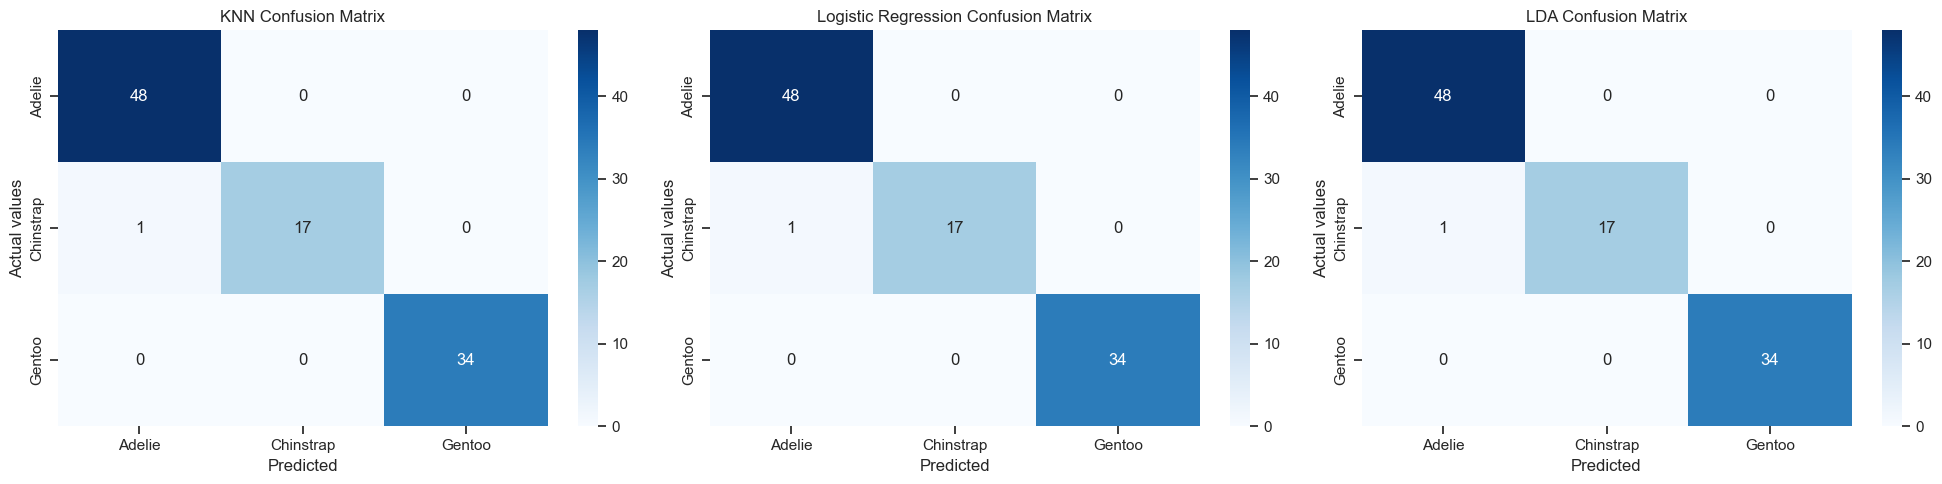

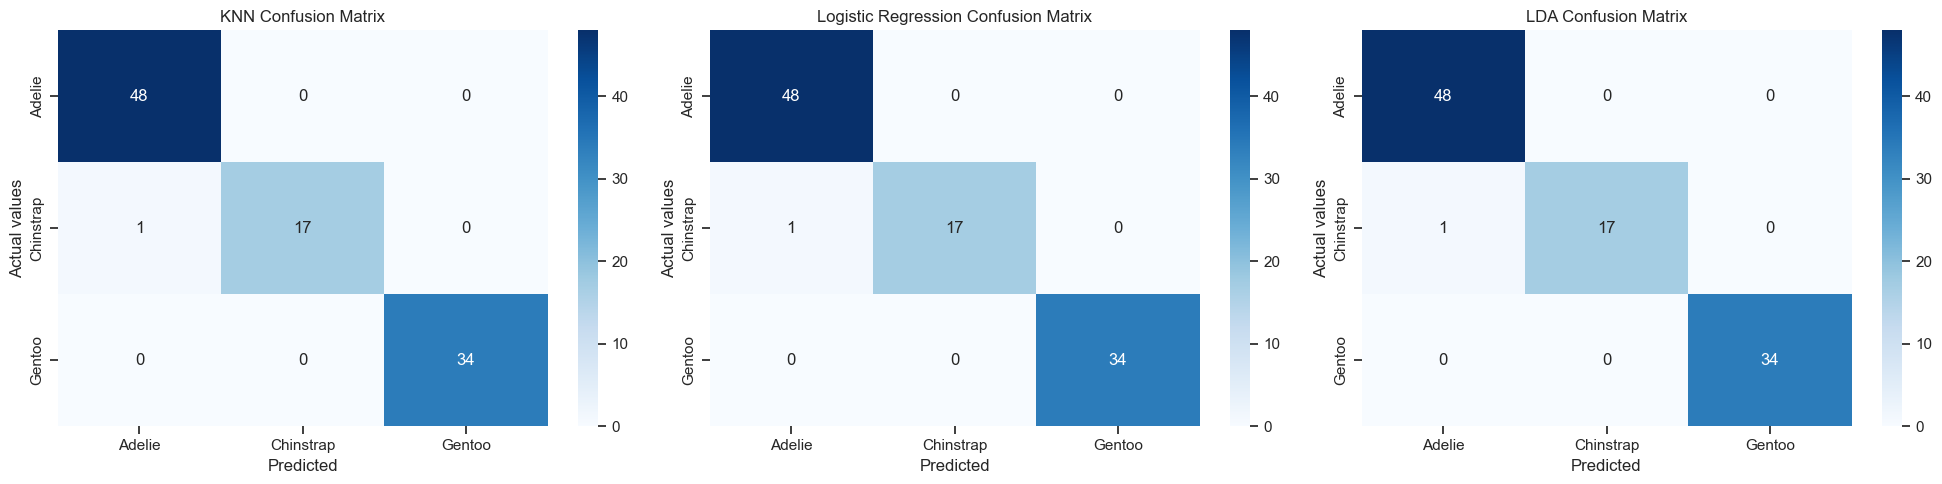

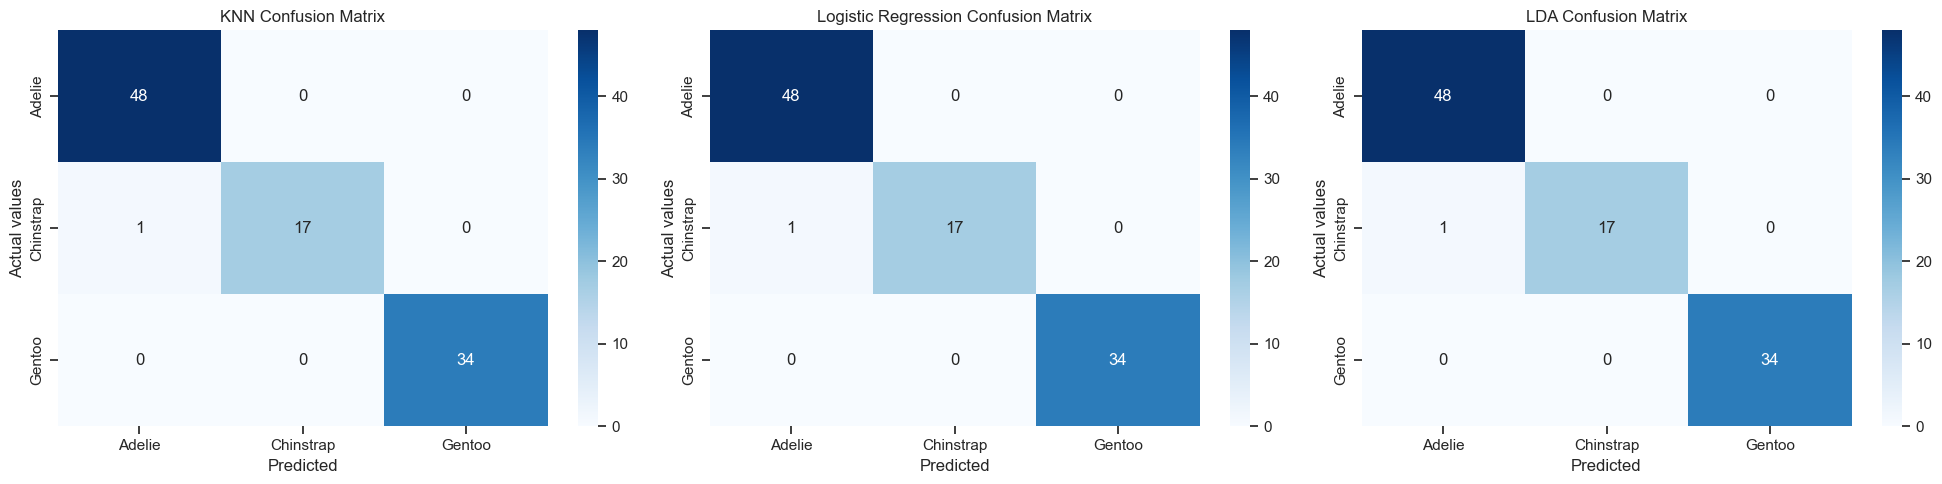

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# Ensure this line is present in a Jupyter Notebook
%matplotlib inline

# Assuming y_test, knn_predictions, log_reg_predictions, and lda_predictions are defined
cm_knn = confusion_matrix(y_test, knn_predictions)
cm_log_reg = confusion_matrix(y_test, log_reg_predictions)
cm_lda = confusion_matrix(y_test, lda_predictions)

# Print confusion matrices to ensure they are not empty
print("KNN Confusion Matrix:")
print(cm_knn)
print("Logistic Regression Confusion Matrix:")
print(cm_log_reg)
print("LDA Confusion Matrix:")
print(cm_lda)

# Plotting matrices with different colors 
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(pd.DataFrame(cm_knn, index=['Adelie', 'Chinstrap', 'Gentoo'], columns=['Adelie', 'Chinstrap', 'Gentoo']), annot=True, ax=axes[0], cmap='Blues')
axes[0].set_title('KNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual values')

sns.heatmap(pd.DataFrame(cm_log_reg, index=['Adelie', 'Chinstrap', 'Gentoo'], columns=['Adelie', 'Chinstrap', 'Gentoo']), annot=True, ax=axes[1], cmap='Blues')    
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual values')

sns.heatmap(pd.DataFrame(cm_lda, index=['Adelie', 'Chinstrap', 'Gentoo'], columns=['Adelie', 'Chinstrap', 'Gentoo']), annot=True, ax=axes[2], cmap='Blues')
axes[2].set_title('LDA Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual values')

plt.tight_layout()
plt.show()

In [16]:
import matplotlib.pyplot as plt
plt.switch_backend('Agg')


: 

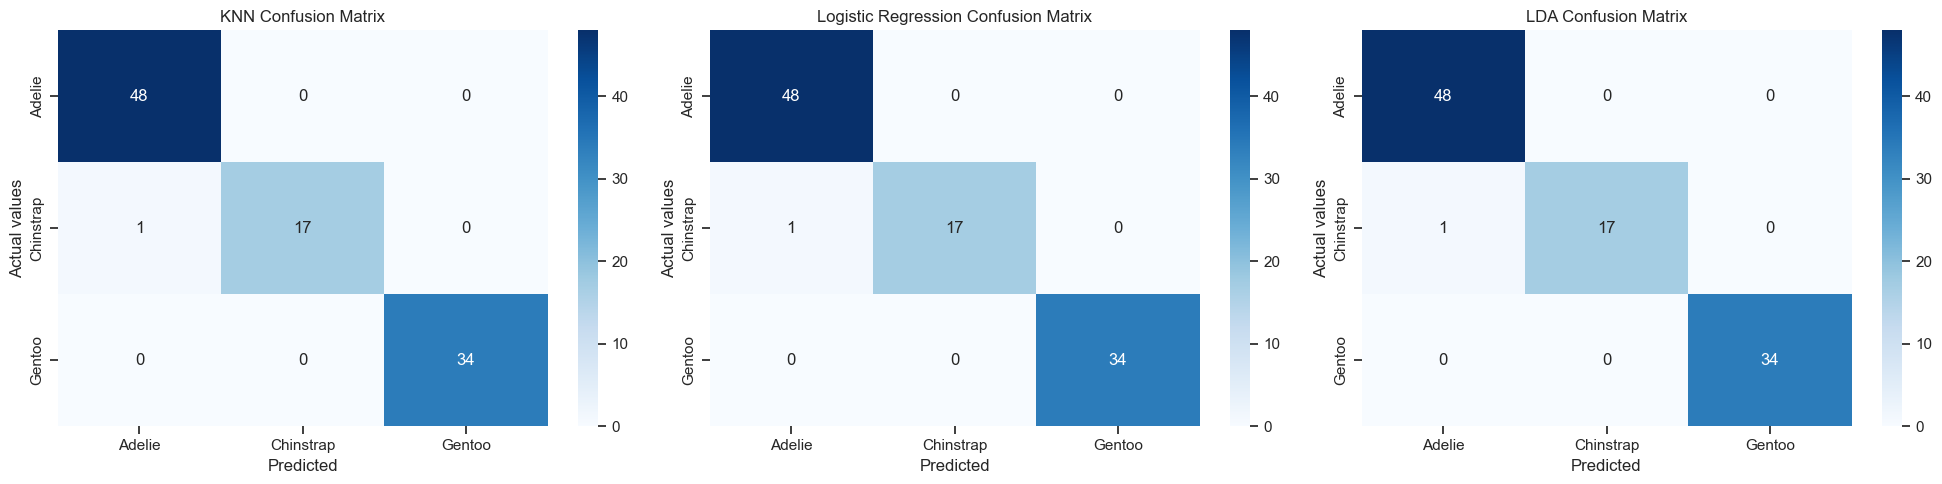

In [18]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test, knn_predictions, log_reg_predictions, and lda_predictions are defined

# Create confusion matrices for each model
cm_knn = confusion_matrix(y_test, knn_predictions)
cm_log_reg = confusion_matrix(y_test, log_reg_predictions)
cm_lda = confusion_matrix(y_test, lda_predictions)

# Plotting the confusion matrix with different colors 
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(cm_knn, xticklabels=['Adelie', 'Chinstrap', 'Gentoo'], yticklabels=['Adelie', 'Chinstrap', 'Gentoo'], annot=True, ax=axes[0], cmap='Blues')
axes[0].set_title('KNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual values')

sns.heatmap(cm_log_reg, xticklabels=['Adelie', 'Chinstrap', 'Gentoo'], yticklabels=['Adelie', 'Chinstrap', 'Gentoo'], annot=True, ax=axes[1], cmap='Blues')    
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual values')

sns.heatmap(cm_lda, xticklabels=['Adelie', 'Chinstrap', 'Gentoo'], yticklabels=['Adelie', 'Chinstrap', 'Gentoo'], annot=True, ax=axes[2], cmap='Blues')
axes[2].set_title('LDA Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual values')

plt.tight_layout()
plt.show()

Now below we will optimize the parameters

In [19]:
#parameter optimization using grid search

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(x_train_scaled, y_train)
best_params_knn = grid_search_knn.best_params_
knn_optimized = KNeighborsClassifier(**best_params_knn)
knn_optimized.fit(x_train_scaled, y_train)
knn_optimized_predictions = knn_optimized.predict(x_test_scaled)
print("Optimized KNN classification report")
print(classification_report(y_test, knn_optimized_predictions))

#optimizing logistic regression
param_grid_log_reg = {
    'C' : [1],
    'multi_class' : ['ovr'],
    'solver': ['liblinear']
}

grid_search_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5)
grid_search_log_reg.fit(x_train_scaled, y_train)
best_params_knn = grid_search_log_reg.best_params_
log_reg_optimized = LogisticRegression(**best_params_knn)
log_reg_optimized.fit(x_train_scaled, y_train)
log_reg_optimized_predictions = log_reg_optimized.predict(x_test_scaled)
print("Optimized Logistic regression classification report")
print(classification_report(y_test, log_reg_optimized_predictions))

#optimizing LDA
param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen']
}

grid_search_lda = GridSearchCV(LinearDiscriminantAnalysis(), param_grid_lda, cv=5)
grid_search_lda.fit(x_train_scaled, y_train)
best_params_lda = grid_search_lda.best_params_
lda_optimized = LinearDiscriminantAnalysis(**best_params_lda)
lda_optimized.fit(x_train_scaled, y_train)
lda_optimized_predictions = lda_optimized.predict(x_test_scaled)    
print("Optimized LDA classification report")
print(classification_report(y_test, lda_optimized_predictions))


Optimized KNN classification report
              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        48
   Chinstrap       0.95      1.00      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Optimized Logistic regression classification report
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

Optimized LDA classification report
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Ch

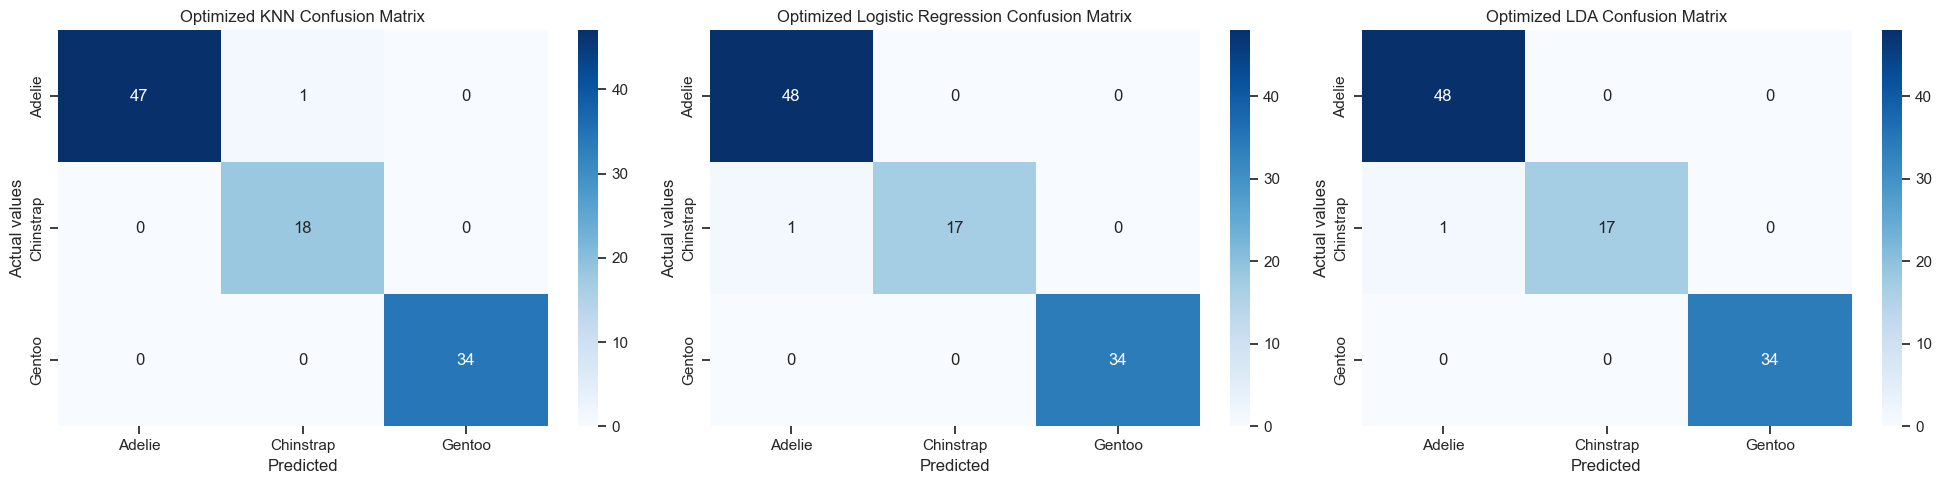

In [20]:
# Creating confusion matrices for optimized models
cm_knn_optimized = confusion_matrix(y_test, knn_optimized_predictions)
cm_log_reg_optimized = confusion_matrix(y_test, log_reg_optimized_predictions)
cm_lda_optimized = confusion_matrix(y_test, lda_optimized_predictions)

#plotting the confusion matrix with different colors
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(pd.DataFrame(cm_knn_optimized, index=['Adelie', 'Chinstrap', 'Gentoo'], columns=['Adelie', 'Chinstrap', 'Gentoo']), annot=True, ax=axes[0], cmap='Blues')
axes[0].set_title('Optimized KNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual values')

sns.heatmap(pd.DataFrame(cm_log_reg_optimized, index=['Adelie', 'Chinstrap', 'Gentoo'], columns=['Adelie', 'Chinstrap', 'Gentoo']), annot=True, ax=axes[1], cmap='Blues')
axes[1].set_title('Optimized Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual values')

sns.heatmap(pd.DataFrame(cm_lda_optimized, index=['Adelie', 'Chinstrap', 'Gentoo'], columns=['Adelie', 'Chinstrap', 'Gentoo']), annot=True, ax=axes[2], cmap='Blues')
axes[2].set_title('Optimized LDA Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual values')

plt.tight_layout()
plt.show()